
# K-Nearest Neighbors

### <b>Welcome to Lab 2a of Machine Learning 101 with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn the about the different evaluation models and metrics. You will be able to identify the strengths and weaknesses of each model and how to incorporate the Bias-Variance trade-off to them.


### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

# K-Nearest Neighbors 
In this Lab you will load the Skulls dataset data, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

---
## <u>Train/Test Split on the Skulls Dataset with K-Nearest Neighbors</u>

### Import Libraries
Import the Following Libraries:
<ul>
    <li> numpy (as np) </li>
    <li> pandas </li>
    <li> KNeighborsClassifier from sklearn.neighbors </li>
</ul>

In [2]:
import numpy as np 
import pandas 
from sklearn.neighbors import KNeighborsClassifier

Using my_data as the <b>skulls.csv</b> data read by panda, declare variables <b>X</b> as the <b>Feature Matrix</b> (<i>data of my_data</i>) and <b>y</b> as the <b>response vector</b> (<i>target</i>)<br>
<i>Note: Use the <b>target</b> function for the <b>response vector</b> and the <b>removeColumns</b> function for the <b>Feature Matrix</b> </i>

In [3]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")

In [4]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    return np.asarray(target)

In [5]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [6]:
X = removeColumns(my_data, 0, 1)
y = target(my_data, 1)

Now to perform <b>train/test split</b> we have to split the <b>X</b> and <b>y</b> into two different sets: The <b>training</b> and <b>testing</b> set. Luckily there is a sklearn function for just that!

Import the <b>train_test_split</b> from <b>sklearn.cross_validation</b>

In [7]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now <b>train_test_split</b> will return <b>4</b> different parameters. We will name this <b>X_train</b>, <b>X_test</b>, <b>y_train</b>, <b>y_test</b>. The <b>train_test_split</b> will need the parameters <b>X</b>, <b>y</b>, <b>test_size=0.3</b>, and <b>random_state=7</b>. The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures we obtain the same splits.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

Now let's print the shape of the training sets to see if they match.

In [9]:
print(x_train.shape)
print(y_train.shape)

(105, 4)
(105,)


Let's check the same with the testing sets! They should both match up!

In [10]:
print(x_test.shape)
print(y_test.shape)

(45, 4)
(45,)


Now similarly with the last lab, let's create declarations of <b>KNeighborsClassifier</b>. Except we will create <b>3</b> different ones:<br>
<b>neigh</b>   -> <b>n_neighbors = 1</b> <br>
<b>neigh23</b> -> <b>n_neighbors = 23</b> <br>
<b>neigh90</b> -> <b>n_neighbors = 90</b> <br>

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn
neigh = knn(n_neighbors=1)
neigh23 = knn(n_neighbors=23)
neigh90 = knn(n_neighbors=90)

Now we will fit each instance of <b>KNeighborsClassifier</b> with the <b>x_train</b> and <b>y_train</b>

In [12]:
neigh.fit(x_train, y_train)
neigh23.fit(x_train, y_train)
neigh90.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='uniform')

Now in our last lab, we only predicted for <b>one</b> datapoint. However, you are able to predict with <b>multiple</b> datapoints. We can do this by just passing in the <b>y_test</b> which contains multiple test points into a <b>predict</b> function of <b>KNeighborsClassifier</b>.

Let's pass the <b>y_test</b> in the <b>predict</b> function each instance of <b>KNeighborsClassifier</b> but store it's returned value into <b>pred</b>, <b>pred23</b>, <b>pred90</b> (corresponding to each of their names)


In [13]:
pred = neigh.predict(x_test)
pred23 = neigh23.predict(x_test)
pred90 = neigh90.predict(x_test)

Awesome! Now let's compute neigh's <b>prediction accuracy</b>. We can do this by using the <b>metrics.accuracy_score</b> function

In [14]:
from sklearn import metrics
print("Neigh's Accuracy: "), print(metrics.accuracy_score(y_test, pred))

Neigh's Accuracy: 
0.2222222222222222


(None, None)

Interesting! Let's do the same for the other instances of KNeighborsClassifier.

In [15]:
print("Neigh23's Accuracy: "), print(metrics.accuracy_score(y_test, pred23))
print("Neigh90's Accuracy: "), print(metrics.accuracy_score(y_test, pred90))

Neigh23's Accuracy: 
0.24444444444444444
Neigh90's Accuracy: 
0.13333333333333333


(None, None)

As shown, the accuracy of <b>neigh23</b> is the highest. When <b>n_neighbors = 1</b>, the model was <b>overfit</b> to the training data (<i>too specific</i>) and when <b>n_neighbors = 90</b>, the model was <b>underfit</b> (<i>too generalized</i>). In comparison, <b>n_neighbors = 23</b> had a <b>good balance</b> between <b>Bias</b> and <b>Variance</b>, creating a generalized model that neither <b>underfit</b> the data nor <b>overfit</b> it.

---
## <u>Train/Test Split on the Diabetes Dataset with Linear Regression</u>

#### Now similar to the previous lab, we will be working with the Diabetes Dataset.

### Importing Libraries
Import the following libraries: 
    <ol>- <b>load_diabetes</b> from <b>sklearn.datasets</b></ol>
    <ol>- <b>LinearRegression</b> from <b>sklearn.linear_model</b></ol>
    <ol>- <b>matplotlib.pyplot</b> (as <b>plt</b>) </ol>
<p>Ensure that you include <b>%matplotlib inline</b> to allow the plots to show up in the notebook </p>

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt
%matplotlib inline

Now create an instance of the diabetes data set by using the <b>load_diabetes</b> function as a variable called <b>diabetes</b>.

In [17]:
diabetes = load_diabetes()

We will also be working with <b>one feature</b> like the last lab.

In [18]:
diabetes_X = diabetes.data[:, None, 2]

Now create an instance of the LinearRegression called LinReg

In [19]:
LinReg = lr()

Now let's use <b>diabetes_X</b> as the <b>Feature Matrix</b> and <b>diabetes.target</b> as the <b>response vector</b> and split it up using <b>train_test_split</b> function we imported earlier (<i>If you haven't, please import it</i>). The <b>train_test_split</b> function should have <b>test_size = 0.3</b> and a <b>random_state = 7</b>. It should return values to <b>X_trainset</b>, <b>X_testset</b>, <b>y_trainset</b>, <b>y_testset</b> as in previous declarations.

In [20]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state = 7)

Train the <b>LinReg</b> model using <b>X_trainset</b> and <b>y_trainset</b>

In [21]:
LinReg.fit(X_trainset, y_trainset)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's <i>plot</i> the graph (similar to last time lab)

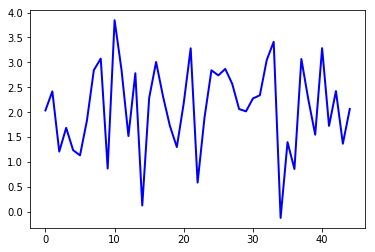

In [22]:
plt.plot(LinReg.predict(X_testset), color='blue', linewidth=2)